In [18]:
import matplotlib.pyplot as plt
import nltk
import PyPDF2
from PyPDF2 import PdfReader
from readability import Readability
from wordcloud import WordCloud, STOPWORDS

In [19]:
#2. In a new notebook, import nltk and run the following commands:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sgnew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sgnew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sgnew\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
#3. Read the two news stories found in this assignment on Canvas. In a markdown cell in your
# notebook, briefly characterize the issue at hand and your impressions from a news reporting
# objectivity perspective.

# Both of the news stories discuss the plagarism charges against the (former) Harvard University President, Claudia Gay.
# The two articles have a much different feel from one another. The Fox news article is very critical, while the
# Reuters article is more defensive of the President. 


In [21]:
#4. Use PyPDF2 to extract the text out of each document
#a. Display the text
#b. Briefly note any anomalies in your notebook


fox = PdfReader("foxnews.pdf")
page = fox.pages[1]
print(page.extract_text()) #only shows first page, need to create a loop to show all and convert to string

2 / 5
Claudine Gay , president of Harvard University , speaks during a House Education and the
Workforce Committee hearing in W ashington, D.C., on Dec. 5.  (Haiyun Jiang/Bloomberg via
Getty Images)
The Free Beacon reported that it "independently verified the veracity of the new allegations
against Gay , as well as the identity of the complainant," who is a professor at another
university who requested "anonymity for fear of retaliation."
Earlier this month, Harvard Corporation, the school’ s highest governing body , announced it
would stand by Gay despite intense backlash to controversial comments about antisemitism
and accusations of plagiarism, although it admitted a probe found "instances of inadequate
citation" in her academic writings. 
The Free Beacon previously reported that in four papers published between 1993 and 2017,
including her doctoral dissertation, Gay "paraphrased or quoted nearly 20 authors —
including two of her colleagues in Harvard University’ s department of gov

In [22]:
fox = PdfReader("foxnews.pdf")
text = ""
for page in fox.pages:
    text += page.extract_text()
    print(text)

type(text)
foxtext = text

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

In [23]:
reader = PdfReader("reuters.pdf")
text = ""
for page in reader.pages:
    text += page.extract_text()
    print(text)

type(text)
reuterstext = text

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

In [24]:
# PDFReader captures everything in the document. Some of these things we don't necessarily want or need to analyze the document.
# For example in the Reuter's document, we see "Advertisement · Scroll to continue", "REUTERS/Ken
# Cedeno/File Photo Acquire Licensing Rights", and "3Acquire Licensing Rights , opens new tab". 
# In the Fox document, we see that the subtitle heading's spacing between letters is off. 
# For example: "HAR VARD STUDENT SA YS THE DECISION T O KEEP THE PRESIDENT IS 'P ART OF A REALL Y LARGE T OXIC CUL TURE' ON CAMPUS"

In [25]:
#5. Use NLTK to complete sentiment analysis for each of the articles
###a. Compare the results from the two articles
###b. Compare the results to your reading of the articles; do you agree with the outcome?

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(foxtext)
print("Sentiment Scores for Fox News Article:", sid.polarity_scores(foxtext))

sid = SentimentIntensityAnalyzer()
sid.polarity_scores(reuterstext)
print("Sentiment Scores for Reuters Article:", sid.polarity_scores(reuterstext))


Sentiment Scores for Fox News Article: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
Sentiment Scores for Reuters Article: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


In [26]:
# 5b. I am surprised that the Fox News Article did not have a greater negative sentiment score.
# I am also surprised that both articles had a high neutral sentiment score. I would not consider either of the articles
# to be neutral. 

In [27]:
#6. Run sentiment analysis on the article headlines

foxheadline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reutersheadline = "Harvard president will submit dissertation edits after plagiarism allegations"

sid = SentimentIntensityAnalyzer()
sid.polarity_scores(foxtext)
print("Sentiment Scores for Fox News Headline:", sid.polarity_scores(foxheadline))

sid = SentimentIntensityAnalyzer()
sid.polarity_scores(reuterstext)
print("Sentiment Scores for Reuters Headline:", sid.polarity_scores(reutersheadline))


Sentiment Scores for Fox News Headline: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Sentiment Scores for Reuters Headline: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [28]:
# 6a. For the most part, the results do agree with the overall sentiment.
# The Reuter's headline had a neutral score of 1.0, making it more neutral than the article itself. 
# The Fox News headline was a bit less neutral than the article itself. But both were mainly neutral, just like the articles. 


In [29]:
#7. Using py-readability-metrics complete 2-3 different readability scores

r = Readability(foxtext)
r.flesch_kincaid()
fk = r.flesch_kincaid()
print("Flesch-Kincaid grade level score for Fox Article:", fk.grade_level)


Flesch-Kincaid grade level score for Fox Article: 19


In [30]:
re = Readability(reuterstext)
re.flesch_kincaid()
fke = re.flesch_kincaid()
print("Flesch-Kincaid grade level score for Reuters Article:", fke.grade_level)

Flesch-Kincaid grade level score for Reuters Article: 19


In [31]:
gf = r.gunning_fog()
print("The Gunning Fog Index for Fox article:", gf.score)
print("The Gunning Fog Grade Level for Fox article:",gf.grade_level)

The Gunning Fog Index for Fox article: 21.868487077434633
The Gunning Fog Grade Level for Fox article: college_graduate


In [32]:
gf = re.gunning_fog()
print("The Gunning Fog Index for Reuters article:", gf.score)
print("The Gunning Fog Grade Level for Reuters article:",gf.grade_level)

The Gunning Fog Index for Reuters article: 19.59404318689501
The Gunning Fog Grade Level for Reuters article: college_graduate


In [33]:
#7a. Discuss what the chosen metric is measuring
#7b. Compare the scores from both articles

# The Flesh-Kincaid readability scores are designed to see how difficult a passage is to read. It uses the number of words, 
# number of syllabuses and number of sentences in order to calculate. The score ranges from 100 (very easy to read, 5th grade)
# to 0 (very difficult to read, professional). Both of the scores for the Fox and Reuters article were 19. This means that
# it is best understood by university graduates.

# The Gunning Fog Index estimates the number of years of formal education a person needs to understand the passage. 
# It finds the average sentence length and counts the number of complex words. For the Fox article, the Gunning Fog 
# index was 21.8, meaning that a person needs 21.8 years of formal education in order to understand the passage. For 
# the Reuters article, the Gunning Fog index was 19.6, meaning that a person needs 19.6 years of formal education in 
# order to understand the reading.

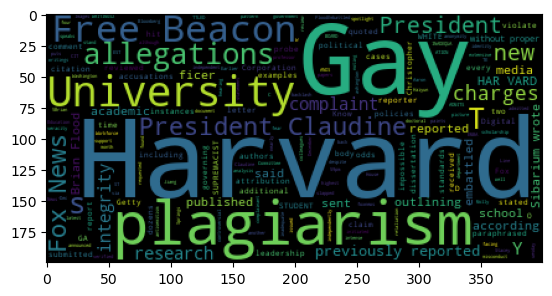

In [34]:
#8. Using wordcloud, create word clouds for both articles
###a. Briefly comment on the word clouds

cloud = WordCloud(stopwords = STOPWORDS).generate(foxtext)
plt.imshow(cloud);

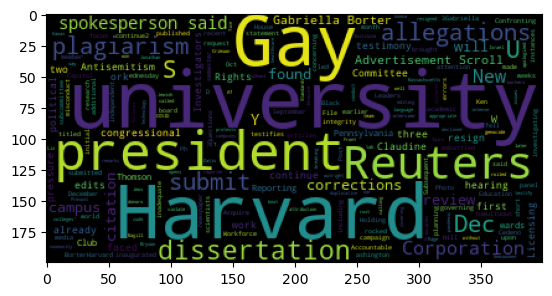

In [35]:
cloud = WordCloud(stopwords = STOPWORDS).generate(reuterstext)
plt.imshow(cloud);

In [ ]:
# The Fox article emphasized President Gay's plagarism more than the Reuters article did, as we can see from the size 
# of the word. The Reuter's article used the term "President more than the Fox article did. It also seems as if 
# the Fox article used "Harvard" more than it did "University". This is different from the Reuter's article that seemed 
# to mention both almost equally based on the size of the words. 